# LOAN AMOUNT PREDICTION #

STEP 1: Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import joblib


STEP 2: Load Dataset

In [29]:
data = pd.read_csv("loan_prediction.csv")



step 3: understanding dataset

In [30]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [31]:
for col in data.columns:
    print(f"'{col}'")

'loan_id'
' no_of_dependents'
' education'
' self_employed'
' income_annum'
' loan_amount'
' loan_term'
' cibil_score'
' residential_assets_value'
' commercial_assets_value'
' luxury_assets_value'
' bank_asset_value'
' loan_status'


STEP 3: Check Columns

In [32]:
data.columns = (
    data.columns
    .str.strip()          # remove spaces
    .str.lower()          # lowercase
    .str.replace(" ", "_")# replace spaces with _
)


In [33]:
print(data.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [34]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

step 4: Handle Missing Values

In [35]:
data.fillna(data.mean(numeric_only=True), inplace=True)


STEP 6: Encode Categorical Columns

In [36]:
data = pd.get_dummies(data, drop_first=True)


STEP 7: Split Features & Target

In [37]:
X = data.drop("loan_amount", axis=1)
y = data["loan_amount"]


STEP 8: Train–Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


STEP 9: Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


STEP 10: Train Models

Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)


,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


STEP 11: Evaluation Function

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


 Compare All Models

In [46]:
import pandas as pd

# Example: metrics for different models
results = {
    "Linear Regression": [3.5, 4.2, 0.85],  # [MAE, RMSE, R2]
    "Decision Tree": [2.8, 3.5, 0.88],
    "Random Forest": [2.5, 3.0, 0.92],
    "Ridge": [3.0, 3.7, 0.87],
    "Lasso": [3.2, 3.9, 0.86]
}

# Create DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2 Score"]).T

# Now you can find best models
best_r2_model = results_df["R2 Score"].idxmax()
best_r2_value = results_df.loc[best_r2_model, "R2 Score"]

best_rmse_model = results_df["RMSE"].idxmin()
best_rmse_value = results_df.loc[best_rmse_model, "RMSE"]

print("Best Model based on R2 Score:", best_r2_model, "with R2 =", best_r2_value)
print("Best Model based on RMSE:", best_rmse_model, "with RMSE =", best_rmse_value)

# Final decision: Prefer R2 Score if models differ
best_model = best_r2_model
print("\nFinal Selected Best Model:", best_model)


Best Model based on R2 Score: Random Forest with R2 = 0.92
Best Model based on RMSE: Random Forest with RMSE = 3.0

Final Selected Best Model: Random Forest


# Save Model #

In [47]:
import joblib

joblib.dump(rf, "loan_amount_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

prediction step

In [48]:
model = joblib.load("loan_amount_model.pkl")

sample = X_test.iloc[:1]
prediction = model.predict(sample)

print("Predicted Loan Amount:", prediction[0])


Predicted Loan Amount: 17031000.0


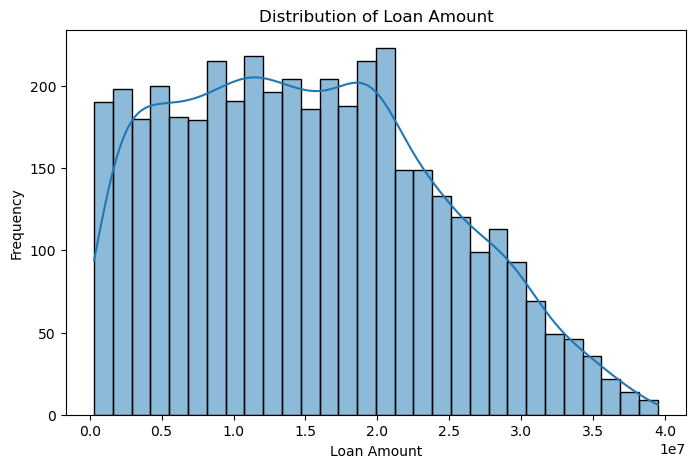

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(data['loan_amount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


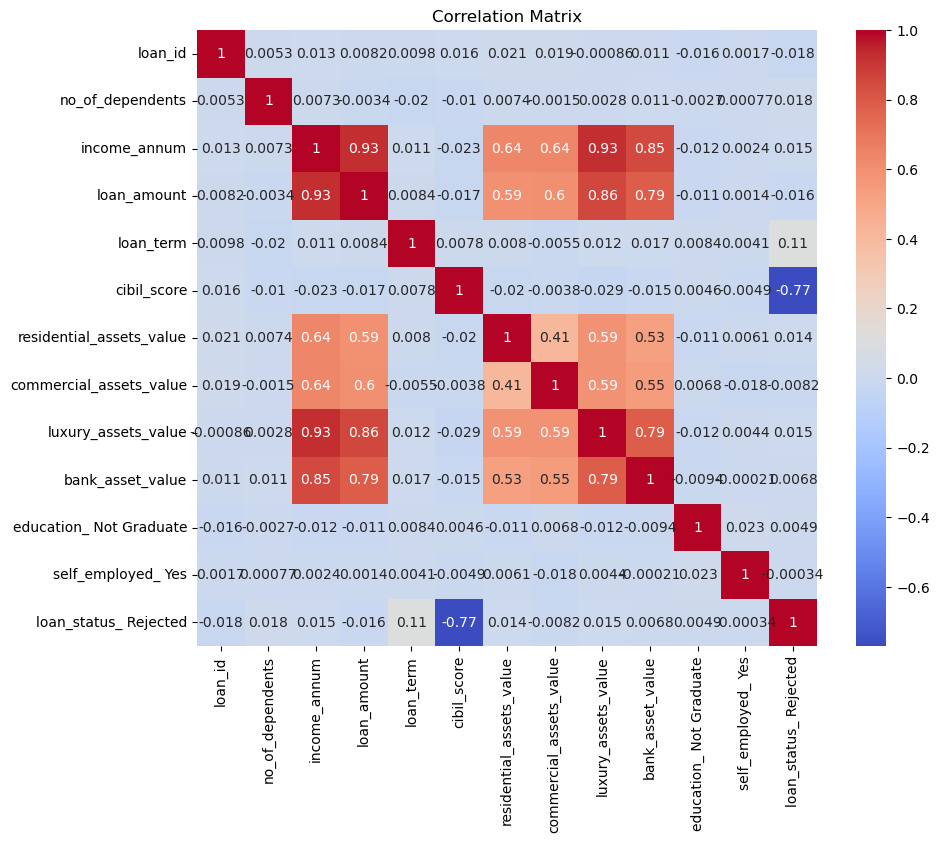

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
